# Project 1 Part 2: Improving the Model, One Piece at a Time

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.2, Friday, Sep 15, 2023. This assignment does not need to be turned in.*

## Overview

This is the second part of Project 1, which takes place in Q1, Weeks 1 and 2. To prepare you for a "real" project next week, you should try and complete this assignment by the end of the session at 12:30. This means having a single notebook for your group with all code, analysis and interpretation completed. You should leave the cell outputs in the notebook.

After reading the project introduction, the assignment consists of three Tasks:
1. Writing functions (Golden Rule No. 4)
2. Running analysis
3. Interpreting the results

We recommend you keep the Workshop assignment from this week (WS02) handy to complete this assignment!

### Working Method

We recommend that you select one group member to prepare the "master" notebook (the notebook that you would turn in if this were required). Other group members can contribute by writing and checking code or analytic expressions on their own computer or paper and sending to the "master" computer.

If you already know how, or don't mind spending a few minutes to set it up, you may also consider uploading your notebook to Deepnote. This is advantageous because you can work on the notebooks simultaneously, and also add comments. Keep in mind, however, that this takes time to set up, so we do not recommend it if you have never used Deepnote before; in addition, this assignment is relatively simple and very similar to Wednesday, so we don't think it is necessary.

## Project 1, Part 2: A Quick Recap

Last week we focused on investigating some of the available data and identifying possible models for predicting the break-up date in the Nenana Ice Classic. We looked at the results of a few models and realized that _a large part of the model error was due to variability in the data._ Most of this is associated with aleatoric uncertainty due to the somewhat-random behaviour of nature. This week we will focus in particular on the uncertainty in ice growth, since that has a direct effect on when and how the tripod falls over and moves downstream.

As a reminder:
- Each year you can bet on the day and time the river ice in the Tanana River, Alaska, will break apart along the waterfront of the town Nenana.
- A tripod is constructed on the ice during the first weekend in March.
- Break-up time is determined as follows: "The Tripod is setup with a unique pulley and clock system that stops the clock once the tripod has moved downstream by 100 ft."
- You can buy a ticket for $3 and place a bet between Feb 1 and April 5.
- Visit the website for more information, or to view a live webcam of the river nenanaakiceclassic.com

## Let's account for the latest news!

You have been thinking about the date to place the bet and you are getting close to the deadline. Since you have waited until last minute, **why not to make use of the latest weather predictions?** You have chosen a model (described below) which determines whether the ice breaks or not for a given weather condition and ice thickness. You have the forecast for the next days and have taken measurements of the ice thickness. Now, you need to predict how much the ice will grow during the next days and your model will give you all the answers!

To model the ice growth, you want to use the classical _Stefan's Problem_, which aims to determine how an ice layer grows as a function of time, given the constraint that the temperature of air ($T_{air}$) is constant, smaller than the freezing temperature $T_{fr}$ and everywhere the same.


![Sketch](./sketch_ice.png)

Using this problem, we can model ice growth as:

$$
H^2_{ice}-H^2_{ice,0} = \frac{2 k_{ice}}{\rho_{ice} l}\int{(T_s-T_{fr})}dt
$$

where $H_{ice}$ is the thickness of the ice at a given time $t$, $H_{ice,0}$ is the thickness of the ice at time $t=0$, $k_{ice}=2.2W/(K \cdot m)$ is the thermal conductivity of ice, $\rho_{ice}=917 kg/m^3$ is the density of ice, $l = 333,4 J/g = 333,4 kJ/kg$ is the latent heat of fusion, $T_s$ is the equal to the temperature of the air and $T_{fr}=273K$ is the freezing temperature of water.

We want to estimate the ice thickness after 3 days, and will assume that the temperature remains stable during that period. Therefore, the previous equation will lead to:

$$
H_{ice} = \sqrt{\frac{2 k_{ice}}{\rho_{ice} l}\Delta T \Delta t+H^2_{ice,0}}
$$

where $\Delta T = |T_s-T_{fr}|$ and $\frac{2 k_{ice}}{\rho_{ice} l} \approx 1.44 \cdot 10^{-8} \ m^2/K s$

**Previous work provides in the following data:**
- Based on the samples of ice measurements, the mean thickness is $\mu_{H0}=0.20m$ and the standard deviation of thickness is $\sigma_{H0}=0.03m$.
- Based on the forecast, the mean air temperature during the next 3 days is $\mu_T=263K$ and the standard deviation of the temperature of $\sigma_T=4K$.
- The rest of the variables are deterministic.
- The ice thickness and the predicted temperature are independent random variables.

**The goal of this project is to answer the following questions (Task 3):**
1. What is the expected value and standard deviation of the ice thickness after 3 days ($\mu_H$ and $\sigma_H$)?
2. Does an estimate of the expected value provide enough information to make your bet, or should we also account for the variability of the thickness when estimating the break-up day?
3. Considering that the distributions of the increment of temperature ($\Delta T$) and initial ice thickness ($H_{ice,0}$) are Normal:
    (a) What does the ice thickness distribution $H_{ice}$ look like?
    (b) Is the Normal distribution a reasonable model for $H_{ice}$?
    (c) Are the propagated and simulated $\mu_H$ and $\sigma_H$ equivalent?

*Note that you are interested in the increment of temperature $|T_s-T_{fr}|$, whose mean is $\mu_{iT}=|263-273|=10K$ and $\sigma_{iT}=4K$.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import probplot

plt.rcParams.update({'font.size': 14})

#### Internal equation check

In [2]:
def stefan(constant, H0, Ts, Tfr, time):
    return np.sqrt(constant*time*abs(Ts-Tfr) + H0**2)

In [3]:
stefan(1.44*10**(-8), 0.15, 261, 273, 3*24*3600)

0.2594026985210447

## Task 1: Write all necessary functions

1. Apply the propagation laws with `H_taylor()` to find the mean and standard deviation of the linearized function of random variables 
2. Find the distribution of `H_ice` numerically with a simulation, then compare this to the Normal distribution defined by the mean and standard deviation of the linearized function of random variables


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>   
Complete the two functions in the cell below, and support your work by including an image showing the analytic equations.
</p>
</div>

In [4]:
def H_taylor(mu_H0, mu_iT, sigma_H0, sigma_iT):
    """ Taylor series approximation of mean and std of h """
    
    constant = 1.44*10**(-8)
    time = 3*24*3600
    
    dhdiT = ((constant*time*mu_iT + mu_H0**2)**(-0.5))*constant/2*time
    dhdH0 = ((constant*time*mu_iT + mu_H0**2)**(-0.5))*mu_H0
    
    dhdiT_2 = -((constant/2*time)**2)*(constant*time*mu_iT+mu_H0**2)**(-1.5)
    dhdH0_2 = (((constant*time*mu_iT + mu_H0**2)**(-0.5)) - 
              mu_H0**2*(constant*time*mu_iT + mu_H0**2)**(-1.5))
    
    mu_H_0 = np.sqrt(constant*time*mu_iT + mu_H0**2)
    mu_H = mu_H_0 + 0.5*dhdiT_2*sigma_iT**2 + 0.5*dhdH0_2*sigma_H0**2
    var_H = (dhdiT**2)*sigma_iT**2 + (dhdH0**2)*sigma_H0**2
    sigma_H = np.sqrt(var_H)
    
    return mu_H, sigma_H

def samples_plot(N, mu_H0, mu_iT, sigma_H0, sigma_iT):
    """Generate samples and plots for V
    
    Compares the approximated Normal distribution of V to numerically
    approximated distribution, found by sampling from the input
    distributions. Comparison is made with two plots:
      1. PDF of V~N(mu,sigma) (the approximation) and a histogram (sample)
      2. Probability plot, compares quantiles of sample and CDF of V
    
    Return: a plot and the mean and std dev of simulated values of H_ice.
    """
    constant = 1.44*10**(-8)
    time = 3*24*3600
    
    H0_samples = np.random.normal(mu_H0, sigma_H0, N)
    iT_samples = np.random.normal(mu_iT, sigma_iT, N)
    h_samples = np.sqrt(constant*time*iT_samples + H0_samples**2)
    mu_H = np.mean(h_samples)
    sigma_H = np.std(h_samples)
    
    # Plot histogram
    xmin = np.min(h_samples)
    xmax = np.max(h_samples)
    x = np.linspace(xmin, xmax, 100)
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].hist(h_samples, bins = 40, density = True, edgecolor='black', linewidth=1.2, 
               label = 'Empirical PDF of ${H_{ice}}$')
    
    # Add normal pdf in same figure
    ax[0].plot(x, norm.pdf(x, mu_H, sigma_H), color = 'black',
               lw = 2.5, label='Normal PDF')
    ax[0].set_xlim(xmin, xmax)
    ax[0].legend()
    ax[0].set_xlabel('${H_{ice} [m]}$')
    ax[0].set_ylabel('Density')
    ax[0].set_title(f'Simulation with {N} simulated realizations'
                    + '\n' + f'mean = {mu_H:.3e}' 
                    f'm and std = {sigma_H:.3e} m')
    
    # Add probability plot in right-side panel
    probplot(h_samples, dist = norm, fit = True, plot = ax[1])
    ax[1].legend(['Generated samples', 'Normal fit'])
    ax[1].get_lines()[1].set_linewidth(2.5)
    plt.show()
    
    return mu_H, sigma_H

## Task 2: Analysis

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2: Analysis</b><br>
Use the functions defined in Task 1 to compute the mean and standard deviation of the linearized function of random variables, and compare the distribution defined by this result to the distribution of $H_{ice}$ found using simulation.
</p>
</div>

Now we can compute the $\mu_H$ and $\sigma_H$ as a function of:
- $\mu_{iT}=10K$ and $\sigma_{iT}=4K$
- $\mu_{H0}=0.20m$ and $\sigma_{H0}=0.03m$

Comparison of propagated and simulated distributions:




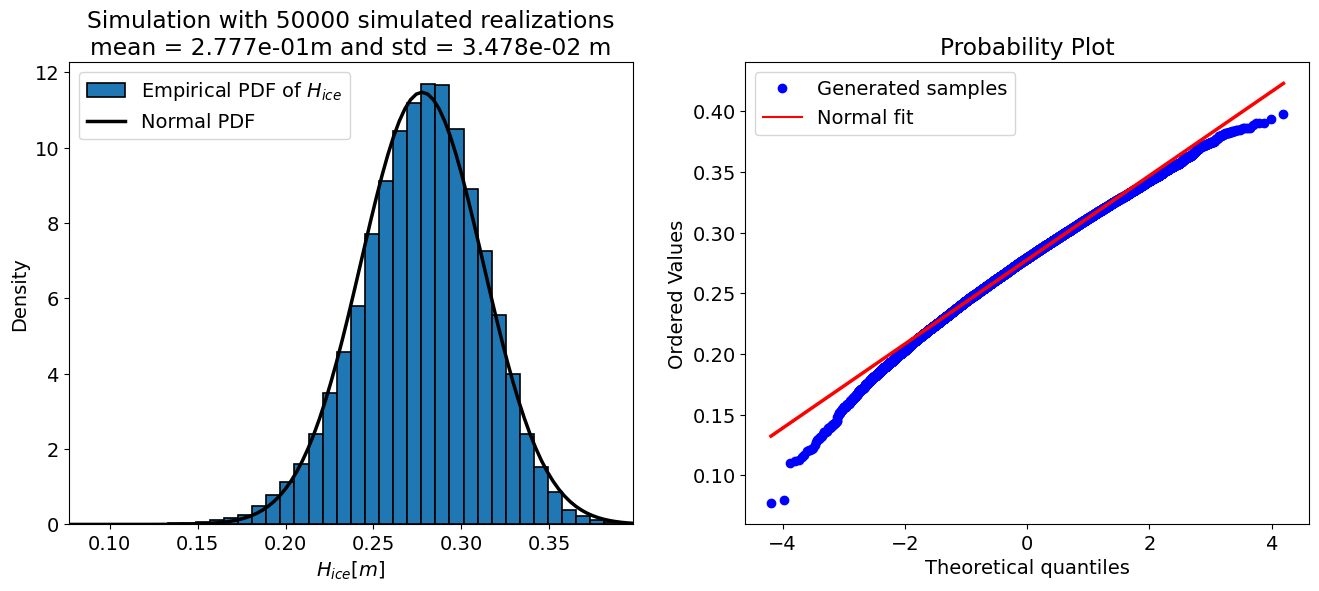



Mean and standard deviation of linearized function:
  μ ₕ= 0.278 m
  σ ₕ= 0.034 m


Mean and standard deviation of simulated distribution:
  μ ₕ = 0.278 m
  σ ₕ= 0.035 m




In [5]:
mu_iT = 10
sigma_iT = 4
mu_H0 = 0.20
sigma_H0 = 0.03
N = 50000

mu_H, sigma_H = H_taylor(mu_H0, mu_iT, sigma_H0, sigma_iT)

print('Comparison of propagated and simulated distributions:\n\n')
mu_H_simulated, sigma_H_simulated = samples_plot(N, mu_H0, mu_iT, sigma_H0, sigma_iT)

print('\n\nMean and standard deviation of linearized function:')
print('  \N{GREEK SMALL LETTER MU}',
        '\N{LATIN SUBSCRIPT SMALL LETTER H}=',
      f'{mu_H:.3f}', 'm')
print('  \N{GREEK SMALL LETTER SIGMA}',
        '\N{LATIN SUBSCRIPT SMALL LETTER H}=',
      f'{sigma_H:.3f}', 'm')

print('\n\nMean and standard deviation of simulated distribution:')
print('  \N{GREEK SMALL LETTER MU}',
        '\N{LATIN SUBSCRIPT SMALL LETTER H} =',
      f'{mu_H_simulated:.3f}', 'm')
print('  \N{GREEK SMALL LETTER SIGMA}',
        '\N{LATIN SUBSCRIPT SMALL LETTER H}=',
      f'{sigma_H_simulated:.3f}', 'm')
print('\n')

## Task 3: Interpretation

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3: Interpretation</b><br>

Answer the following questions in a Markdown cell using the results from Task 2:
    <ol>
        <li>Explain whether we should use the expected value for our prediction, or whether we should also account for the variability of the thickness estimate in the subsequent phases of our analysis?</li>
        <li>What does the ice thickness distribution $H_{ice}$ look like?</li>
        <li>Are the propagated and simulated $\mu_H$ and $\sigma_H$ equivalent?</li>
        <li>Is the Normal distribution a reasonable model for $H_{ice}$?</li>
    </ol>
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<b>Solution</b><br>
<ol>
    <li>It depends! $\sigma_H$ = 0.034m is approximately 10% of $\mu_H=$0.278m; whether or not this is a large variability depends on the sensitivity of our (unknown) model for predicting break-up day as a function of ice thickness. If that model is not very sensitive to ice thickness, it may not be necessary to account for the uncertainty in subsequent phases of the analysis and we can use the expected value directly. If it is very sensitive to this parameter, we should include the uncertainty, perhaps with another round of uncertainty propagaation (or numerical simulation).</li>
    <li>In order to assess whether the Normal distribution is a reasonable model for $H_{ice}$, we need to propagate the uncertainty through simulations. That is, we know the distribution functions of the inputs $\Delta T$ and $H_{ice,0}$ and we know that they are independent, so we can generate random samples of them directly from the distribution functions, plug them into the function and use the resulting realizations of $H_{ice}$ to approximate the "true" distribution. After doing this in Task 2, we can see that the PDF of the Normal distribution matches the histogram quite closely, so the choice of a Normal distribution is OK. However, looking at the quantile plot indicates that the extreme low values of the distribution (the lower, or left tail) are not approximated well by the Normal distribution.</li>
    <li>They are not exactly equivalent, but within 1 mm of each other, which is close enough for our purposes of estimation.</li>
    <li>Yes, since the central moments seem to be properly estimated the Normal distribution would be a reasonable model, with one exception: we can see that the simulated values deviate from the line in the lower tails. Thus, if you are interested in estimating values with low non-excceedance probabilities this is a bad model: we can see that below 3 standard deviations the difference is a few cm, or around 10% of the expected value. This would be a concern if your break-up date model is sensitive to accurately predicting the likelihood of exceptionally small ice thicknesses given the uncertainty in our estimates of the future temperature and past measurements of the true ice thickness.</li>
    
</ol>
</div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.